**데이터 불러오기**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

from tqdm import tqdm
import time

In [ ]:
df_1 = pd.read_csv('./data1.csv')
df_2 = pd.read_csv('./data2.csv')

In [ ]:
df = pd.concat([df_1,df_2])

In [ ]:
df.columns

Index(['양/불', '전후간격', '좌우간격', '전후시간', '좌우시간', '수소공급량', '산소공급량', '버너회전수',
       '버너속도', '핀치두께-상', '핀치두께-하', '핀치두께-편차', '전극간격', '정면부편차-1', '정면부편차-2',
       '정면부편차-편차', '측면부편차-1', '측면부편차-2', '측면부편차-편차'],
      dtype='object')

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.describe()

,양/불,전후간격,좌우간격,전후시간,좌우시간,수소공급량,산소공급량,버너회전수,버너속도,핀치두께-상,핀치두께-하,핀치두께-편차,전극간격,정면부편차-1,정면부편차-2,정면부편차-편차,측면부편차-1,측면부편차-2,측면부편차-편차
count,1607.000000,1607.000000,1607.000000,1.607000e+03,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000
mean,0.066584,4.046584,0.708874,3.080000e+00,3.316988,78.873678,46.967642,11.821406,38.519602,3.698687,3.704984,-0.006297,353.868071,8.090173,7.967984,0.122189,0.989219,0.977693,0.011526
std,0.249377,0.090815,0.057923,5.375152e-14,0.282761,1.931156,6.118298,0.383131,0.542774,0.084705,0.087024,0.023260,13.787709,1.936468,1.864995,0.412711,0.221603,0.197371,0.350702
min,0.000000,3.870000,0.510000,3.080000e+00,3.200000,74.000000,39.000000,11.000000,38.000000,3.360000,3.350000,-0.150000,318.690000,0.300000,0.060000,-1.410000,0.300000,0.060000,-1.090000
25%,0.000000,3.980000,0.700000,3.080000e+00,3.200000,76.000000,40.000000,12.000000,38.000000,3.660000,3.670000,-0.020000,339.660000,8.420000,8.310000,-0.150000,0.830000,0.840000,-0.240000
50%,0.000000,4.080000,0.700000,3.080000e+00,3.200000,80.000000,53.000000,12.000000,38.000000,3.710000,3.720000,-0.010000,366.310000,8.570000,8.460000,0.100000,0.990000,0.970000,0.000000
75%,0.000000,4.080000,0.700000,3.080000e+00,3.200000,80.000000,53.000000,12.000000,39.000000,3.750000,3.760000,0.010000,367.050000,8.720000,8.600000,0.350000,1.150000,1.120000,0.280000
max,1.000000,4.220000,0.900000,3.080000e+00,4.000000,80.000000,53.000000,12.000000,40.000000,3.970000,4.000000,0.120000,368.220000,9.300000,9.180000,1.460000,1.850000,1.580000,1.090000


In [ ]:
# 양품, 불량 수
df['양/불'].value_counts()

0    1500
1     107
Name: 양/불, dtype: int64

In [ ]:
neg, pos = np.bincount(df['양/불'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 1607
    Positive: 107 (6.66% of total)



overfitting 문제를 피하기 위해서 train, test, validation 데이터를 나눠준다.

*   validation -> used during the model fitting to evaluate the loss and matrics
*   test -> completely unused during the training phase and is only used at the end to evalutate how well the model generalizes to new data



In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2,stratify=df['양/불'])
train_df, val_df = train_test_split(train_df, test_size=0.1,stratify=train_df['양/불'])

train_labels = np.array(train_df.pop('양/불'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('양/불'))
test_labels = np.array(test_df.pop('양/불'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (1156,)
Validation labels shape: (129,)
Test labels shape: (322,)
Training features shape: (1156, 18)
Validation features shape: (129, 18)
Test features shape: (322, 18)


In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

## Random Forest

In [ ]:
param_grid_rf= [{'n_estimators':[10,13,15,17],
                 'criterion':['gini','entropy'],
                 'max_depth':[11,13,15,17]
                }]

forest_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(forest_clf,param_grid_rf,cv=5)
grid_search_rf.fit(train_features,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [11, 13, 15, 17],
                          'n_estimators': [10, 13, 15, 17]}])

In [ ]:
forest_clf = grid_search_rf.best_estimator_

In [ ]:
rf_train_predictions_baseline = forest_clf.predict(train_features)
rf_test_predictions_baseline = forest_clf.predict(test_features)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

accuracy :  0.9409937888198758
precision :  0.75
recall :  0.14285714285714285
f1 :  0.24
auc :  0.569767441860465
Legitimate Transactions Detected (True Negatives):  300
Legitimate Transactions Incorrectly Detected (False Positives):  1
Fraudulent Transactions Missed (False Negatives):  18
Fraudulent Transactions Detected (True Positives):  3
Total Fraudulent Transactions:  21


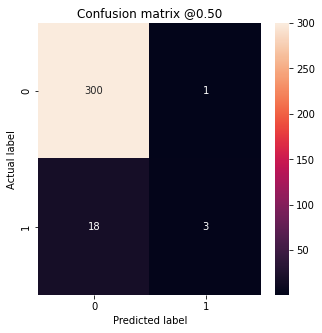

In [ ]:
print('accuracy : ',accuracy_score(test_labels, rf_test_predictions_baseline))
print('precision : ',precision_score(test_labels, rf_test_predictions_baseline))
print('recall : ',recall_score(test_labels, rf_test_predictions_baseline))
print('f1 : ', f1_score(test_labels, rf_test_predictions_baseline))
print('auc : ',roc_auc_score(test_labels, rf_test_predictions_baseline))

plot_cm(test_labels, rf_test_predictions_baseline)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  auc = sklearn.metrics.roc_auc_score
  print('auc of ',name,' is ',auc)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

In [ ]:
def plot_precision_recall_curve(name, labels, predictions, **kwargs):
  precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

  plt.plot(recall, precision, label=name, linewidth=2, **kwargs)
  plt.xlabel('precision')
  plt.ylabel('recall')
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')


In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

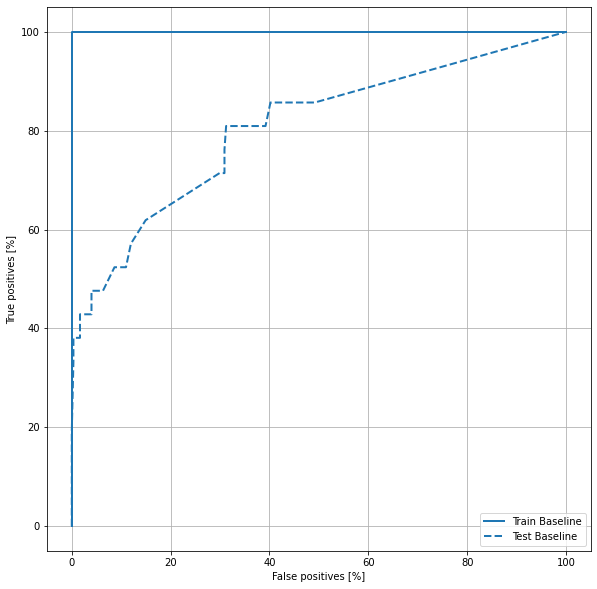

In [ ]:
plot_roc("Train Baseline", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_roc("Test Baseline", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')
plt.legend(loc='lower right')

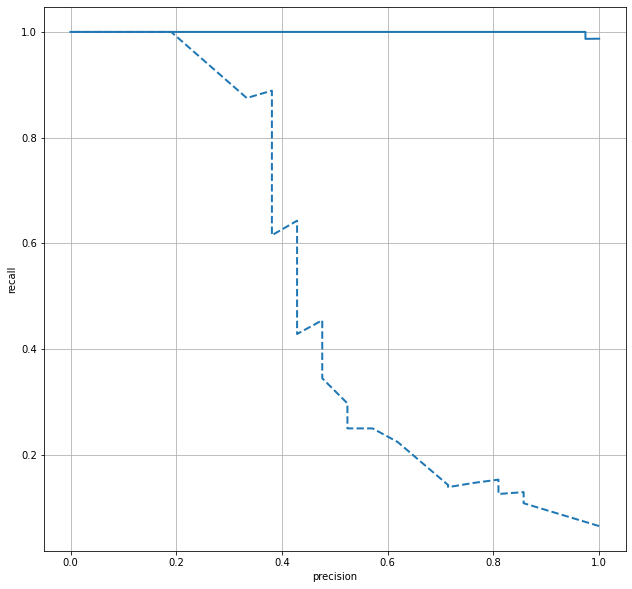

In [ ]:
plot_precision_recall_curve("Train Baseline", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_precision_recall_curve("Test Baseline", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

## **DNN 모델**

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

In [ ]:
model = keras.Sequential([
      keras.layers.Dense(64, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)


In [ ]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 64)                1216      
                                                                 
 dropout_63 (Dropout)        (None, 64)                0         
                                                                 
 dense_101 (Dense)           (None, 32)                2080      
                                                                 
 dropout_64 (Dropout)        (None, 32)                0         
                                                                 
 dense_102 (Dense)           (None, 16)                528       
                                                                 
 dropout_65 (Dropout)        (None, 16)                0         
                                                                 
 dense_103 (Dense)           (None, 1)               

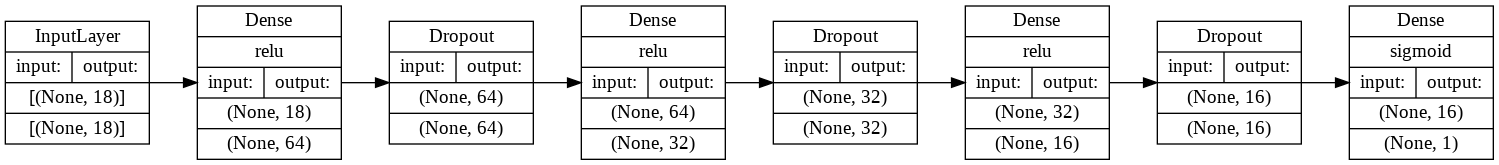

In [ ]:
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           rankdir='LR',
           expand_nested=True,
           )

In [ ]:
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels)
    )

Epoch 1/100
37/37 [==============================] - 3s 33ms/step - loss: 0.4938 - tp: 23.0000 - fp: 173.0000 - tn: 1207.0000 - fn: 75.0000 - accuracy: 0.8322 - precision: 0.1173 - recall: 0.2347 - auc: 0.6025 - prc: 0.1500 - val_loss: 0.2955 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 120.0000 - val_fn: 9.0000 - val_accuracy: 0.9302 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6014 - val_prc: 0.0817
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 0.3114 - tp: 0.0000e+00 - fp: 9.0000 - tn: 1070.0000 - fn: 77.0000 - accuracy: 0.9256 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5162 - prc: 0.0683 - val_loss: 0.2219 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 120.0000 - val_fn: 9.0000 - val_accuracy: 0.9302 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8222 - val_prc: 0.2481
Epoch 3/100
37/37 [==============================] - 0s 9ms/step - loss: 0.2846 - tp: 0.0000e+00 - fp: 3.0000 - tn: 1076.0000 

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train '+label)
  
  plt.semilogy(history.epoch, history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

  plt.legend()

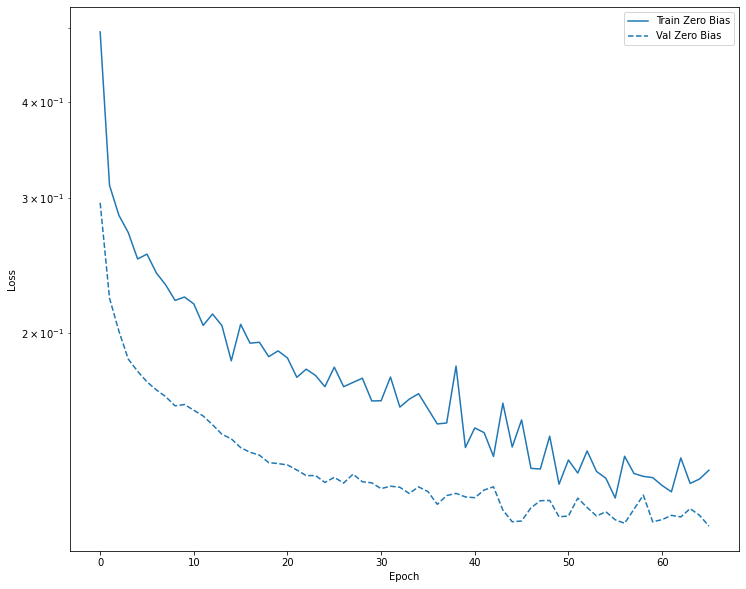

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.19362126290798187
tp :  4.0
fp :  2.0
tn :  299.0
fn :  17.0
accuracy :  0.9409937858581543
precision :  0.6666666865348816
recall :  0.190476194024086
auc :  0.8554025888442993
prc :  0.37739691138267517

Legitimate Transactions Detected (True Negatives):  299
Legitimate Transactions Incorrectly Detected (False Positives):  2
Fraudulent Transactions Missed (False Negatives):  17
Fraudulent Transactions Detected (True Positives):  4
Total Fraudulent Transactions:  21


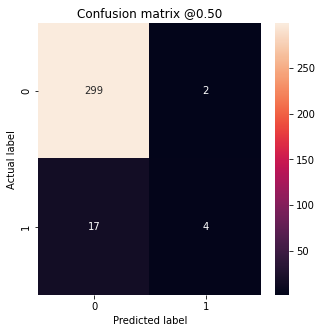

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()


plot_cm(test_labels, test_predictions_baseline)

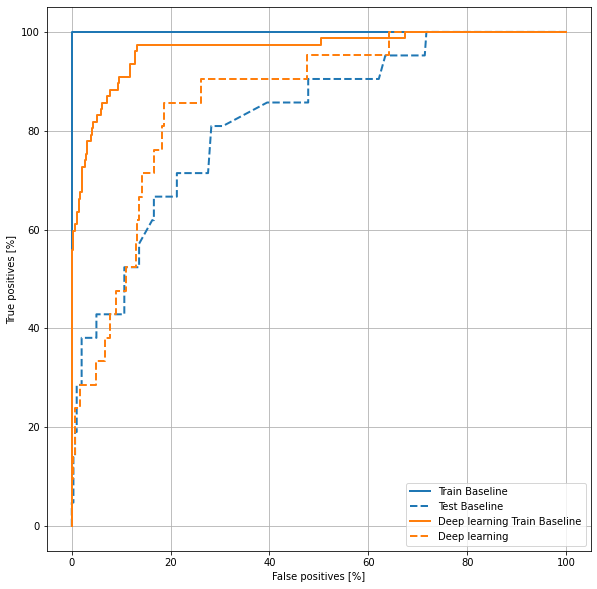

In [ ]:
plot_roc("Train Baseline", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_roc("Test Baseline", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

plot_roc("Deep learning Train Baseline", train_labels, train_predictions_baseline, color=colors[1])
plot_roc("Deep learning", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')
plt.legend(loc='lower right')

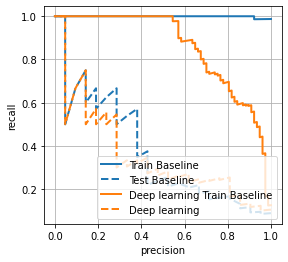

In [ ]:
plot_precision_recall_curve("Train Baseline", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_precision_recall_curve("Test Baseline", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

plot_precision_recall_curve("Deep learning Train Baseline", train_labels, train_predictions_baseline, color=colors[1])
plot_precision_recall_curve("Deep learning", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')
plt.legend(loc='lower right')

# 클래스 가중치

[weighting the loss function](https://arxiv.org/pdf/1708.03211.pdf)

In [ ]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.54
Weight for class 1: 7.51


In [ ]:
weighted_model = keras.Sequential([
      keras.layers.Dense(64, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid')
  ])

weighted_model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [ ]:
weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),

    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
37/37 [==============================] - 5s 44ms/step - loss: 0.7858 - tp: 15.0000 - fp: 149.0000 - tn: 1050.0000 - fn: 71.0000 - accuracy: 0.8288 - precision: 0.0915 - recall: 0.1744 - auc: 0.5530 - prc: 0.1496 - val_loss: 0.5634 - val_tp: 4.0000 - val_fp: 18.0000 - val_tn: 102.0000 - val_fn: 5.0000 - val_accuracy: 0.8217 - val_precision: 0.1818 - val_recall: 0.4444 - val_auc: 0.6991 - val_prc: 0.3584
Epoch 2/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6965 - tp: 35.0000 - fp: 287.0000 - tn: 792.0000 - fn: 42.0000 - accuracy: 0.7154 - precision: 0.1087 - recall: 0.4545 - auc: 0.5848 - prc: 0.1179 - val_loss: 0.6189 - val_tp: 7.0000 - val_fp: 37.0000 - val_tn: 83.0000 - val_fn: 2.0000 - val_accuracy: 0.6977 - val_precision: 0.1591 - val_recall: 0.7778 - val_auc: 0.8454 - val_prc: 0.4616
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.6527 - tp: 44.0000 - fp: 360.0000 - tn: 719.0000 - fn: 33.0000 - accuracy: 0.6600 - precisio

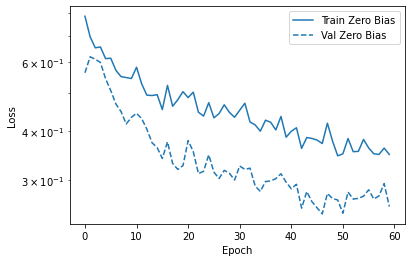

In [ ]:
plot_loss(weighted_history, "Zero Bias", 0)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.3496944010257721
tp :  13.0
fp :  44.0
tn :  257.0
fn :  8.0
accuracy :  0.8385093212127686
precision :  0.22807016968727112
recall :  0.6190476417541504
auc :  0.8465433120727539
prc :  0.32570821046829224

Legitimate Transactions Detected (True Negatives):  257
Legitimate Transactions Incorrectly Detected (False Positives):  44
Fraudulent Transactions Missed (False Negatives):  8
Fraudulent Transactions Detected (True Positives):  13
Total Fraudulent Transactions:  21


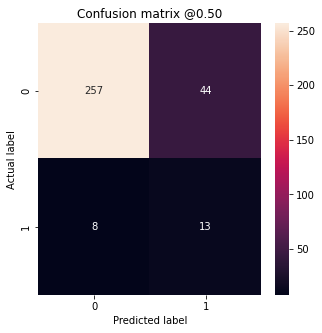

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

## **오버샘플링**

[code](https://github.com/hk-mp5a3/Class-Imbalance)
[SMOTE](https://arxiv.org/pdf/1106.1813.pdf)
[ADASYN](https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf)

이탤릭체 텍스트# SMOTE Synthetic Minority Over-sampling Technique

1. Take the difference between the feature vector
2. Multiply this difference by a random number between 0 and 1
3. Add it to the feature vector
-> this causes the selection of a random point along the line segment between two specific features.

In [ ]:
from sklearn.neighbors import NearestNeighbors
import random


class Smote:
    """
    Implement SMOTE, synthetic minority oversampling technique.
    Parameters
    -----------
    sample      2D (numpy)array
                minority class samples
    N           Integer
                amount of SMOTE N%
    k           Integer
                number of nearest neighbors k
                k <= number of minority class samples
    Attributes
    ----------
    newIndex    Integer
                keep a count of number of synthetic samples
                initialize as 0
    synthetic   2D array
                array for synthetic samples
    neighbors   K-Nearest Neighbors model
    """
    def __init__(self, sample, N, k):
        self.sample = sample
        self.k = k
        self.T = len(self.sample)
        self.N = N
        self.newIndex = 0
        self.synthetic = []
        self.neighbors = NearestNeighbors(n_neighbors=self.k).fit(self.sample)

    def over_sampling(self):
        if self.N < 100:
            self.T = (self.N / 100) * self.T
            self.N = 100
        self.N = int(self.N / 100)

        for i in range(0, self.T):
            nn_array = self.compute_k_nearest(i)
            self.populate(self.N, i, nn_array)

    def compute_k_nearest(self, i):
        nn_array = self.neighbors.kneighbors([self.sample[i]], self.k, return_distance=False)
        if len(nn_array) is 1:
            return nn_array[0]
        else:
            return []

    def populate(self, N, i, nn_array):
        while N is not 0:
            nn = random.randint(0, self.k - 1)
            self.synthetic.append([])
            for attr in range(0, len(self.sample[i])):
                dif = self.sample[nn_array[nn]][attr] - self.sample[i][attr]
                gap = random.random()
                self.synthetic[self.newIndex].append(self.sample[i][attr] + gap * dif)
            self.newIndex += 1
            N -= 1

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
N = int(100 * len(neg_features)/len(pos_features))

In [ ]:
N

1401

In [ ]:
s = Smote(sample=pos_features, N=N, k=5)
s.over_sampling()
len(s.synthetic)

1078

In [ ]:
res_pos_features = np.concatenate((pos_features,np.array(s.synthetic)))
res_pos_labels = np.ones(shape=(res_pos_features.shape[0]),dtype=int)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2234, 18)

In [ ]:
resampled_model = keras.Sequential([
      keras.layers.Dense(64, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid')
  ])

resampled_model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [ ]:
resampled_history = resampled_model.fit(
    resampled_features,
    resampled_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
70/70 [==============================] - 3s 20ms/step - loss: 0.6732 - tp: 817.0000 - fp: 636.0000 - tn: 744.0000 - fn: 359.0000 - accuracy: 0.6107 - precision: 0.5623 - recall: 0.6947 - auc: 0.6764 - prc: 0.5994 - val_loss: 0.5741 - val_tp: 6.0000 - val_fp: 15.0000 - val_tn: 105.0000 - val_fn: 3.0000 - val_accuracy: 0.8605 - val_precision: 0.2857 - val_recall: 0.6667 - val_auc: 0.8037 - val_prc: 0.6852
Epoch 2/100
70/70 [==============================] - 1s 7ms/step - loss: 0.5952 - tp: 764.0000 - fp: 374.0000 - tn: 705.0000 - fn: 391.0000 - accuracy: 0.6576 - precision: 0.6714 - recall: 0.6615 - auc: 0.7352 - prc: 0.7684 - val_loss: 0.4956 - val_tp: 6.0000 - val_fp: 10.0000 - val_tn: 110.0000 - val_fn: 3.0000 - val_accuracy: 0.8992 - val_precision: 0.3750 - val_recall: 0.6667 - val_auc: 0.8412 - val_prc: 0.6922
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 0.5497 - tp: 796.0000 - fp: 296.0000 - tn: 783.0000 - fn: 359.0000 - accuracy: 0.7068 - pr

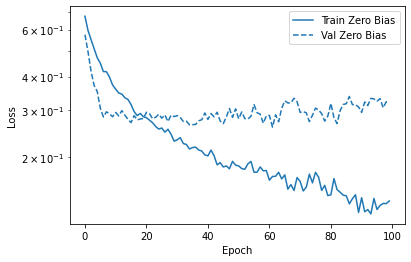

In [ ]:
plot_loss(resampled_history, "Zero Bias", 0)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.34229350090026855
tp :  10.0
fp :  20.0
tn :  281.0
fn :  11.0
accuracy :  0.9037266969680786
precision :  0.3333333432674408
recall :  0.4761904776096344
auc :  0.7800980806350708
prc :  0.3538842797279358

Legitimate Transactions Detected (True Negatives):  281
Legitimate Transactions Incorrectly Detected (False Positives):  20
Fraudulent Transactions Missed (False Negatives):  11
Fraudulent Transactions Detected (True Positives):  10
Total Fraudulent Transactions:  21


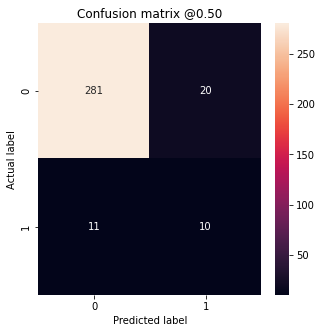

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

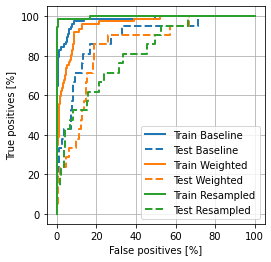

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

# ADASYN

1. i번째 소수 클래스 데이터 x_i에서 모든 데이터에 대해 KNN을 적용 후, 그 중 다수 클래스의 데이터 갯수 m_i를 센다.
2. 그리고 다수 클래스의 비율을 r_i = m_i/k라고 정의한다
3. 모든 i에 대한 r_i의 계산이 끝나면, r_i의 합이 1이 되도록 정규화 한다.
4. 정규화 된 r_i와 다수 클래스와 소수 클래스 간의 개수 차이를 곱하고 반올림 한다. 이렇게 주어진 숫자가 x_i에서 오버 샘플링 될 데이터의 개수가 된다.
5. 모든 i에 대하여 계산된 개수만큼 SMOTE 알고리즘을 적용해서 오버 샘플링을 수행한다.

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random


class Adasyn:
    """
    ADASYN: Adaptive Synthetic Sampling
    Parameters
    -----------
    X           2D array
                feature space X
    Y           array
                label, y is either -1 or 1
    dth         float in (0,1]
                preset threshold
                maximum tolerated degree of class imbalance ratio
    b           float in [0, 1]
                desired balance level after generation of the synthetic data
    K           Integer
                number of nearest neighbors
    Attributes
    ----------
    ms          Integer
                the number of minority class examples
    ml          Integer
                the number of majority class examples
    d           float in n (0, 1]
                degree of class imbalance, d = ms/ml
    minority    Integer label
                the class label which belong to minority
    neighbors   K-Nearest Neighbors model
    synthetic   2D array
                array for synthetic samples
    """
    def __init__(self, X, Y, dth, b, K):
        self.X = X
        self.Y = Y
        self.K = K
        self.ms, self.ml, self.d, self.minority = self.calculate_degree()
        self.dth = dth
        self.b = b
        self.neighbors = NearestNeighbors(n_neighbors=self.K).fit(self.X)
        self.synthetic = []

    def calculate_degree(self):
        pos, neg = 0, 0
        for i in range(0, len(self.Y)):
            if self.Y[i] == 1:
                pos += 1
            elif self.Y[i] == 0:
                neg += 1
        ml = max(pos, neg)
        ms = min(pos, neg)
        d = 1. * ms / ml
        if pos > neg:
            minority = 0
        else:
            minority = 1
        return ms, ml, d, minority

    def sampling(self):
        if self.d < self.dth:
            # a: calculate the number of synthetic data examples
            #    that need to be generated for the minority class
            G = (self.ml - self.ms) * self.b

            # b: for each xi in minority class, find K nearest neighbors
            # based on Euclidean distance in n-d space and calculate ratio
            # ri = number of examples in K nearest neighbors of xi that
            # belong to majority class, therefore ri in [0,1]
            r = []
            for i in range(0, len(self.Y)):
                if self.Y[i] == self.minority:
                    delta = 0
                    neighbors = self.neighbors.kneighbors([self.X[i]], self.K, return_distance=False)[0]
                    for neighbors_index in neighbors:
                        if self.Y[neighbors_index] != self.minority:
                            delta += 1
                    r.append(1. * delta/self.K)

            # c: normalize ri to get density distribution
            r = np.array(r)
            sum_r = np.sum(r)
            if sum_r == 0:
                raise ValueError("NaN values appear. Please "
                                 "try to use SMOTE or other methods.""")
            r = r / sum_r

            # d: calculate the number of synthetic data examples that
            # need to be generated for each minority example xi
            g = r * G

            # e: for each minority class data example, generate gi
            # synthetic data examples
            index = 0
            for i in range(0, len(self.Y)):
                if self.Y[i] == self.minority:
                    neighbors = self.neighbors.kneighbors([self.X[i]], self.K, return_distance=False)[0]
                    xzi_set = []
                    for j in neighbors:
                        if self.Y[j] == self.minority:
                            xzi_set.append(j)

                    for g_index in range(0, int(g[index])):
                        random_num = random.randint(0, len(xzi_set) - 1)
                        xzi = np.array(self.X[xzi_set[random_num]])
                        xi = np.array(self.X[i])
                        random_lambda = random.random()
                        self.synthetic.append((xi + (xzi - xi) * random_lambda).tolist())
                    index += 1

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
A = Adasyn(train_features, train_labels, dth=1,b=1,K=8)
A.sampling()
len(A.synthetic)

972

In [ ]:
res_pos_features = np.concatenate((pos_features,np.array(A.synthetic)))
res_pos_labels = np.ones(shape=(res_pos_features.shape[0]),dtype=int)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2128, 18)

In [ ]:
resampled_model_adasyn = keras.Sequential([
      keras.layers.Dense(64, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid')
  ])

resampled_model_adasyn.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [ ]:
early_stopping_adasyn = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=40,
    mode='min',
    restore_best_weights=True)

In [ ]:
resampled_history_adasyn = resampled_model_adasyn.fit(
    resampled_features,
    resampled_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping_adasyn],
    validation_data=(val_features, val_labels))

Epoch 1/100
67/67 [==============================] - 1s 13ms/step - loss: 0.0767 - tp: 1027.0000 - fp: 29.0000 - tn: 1050.0000 - fn: 22.0000 - accuracy: 0.9760 - precision: 0.9725 - recall: 0.9790 - auc: 0.9947 - prc: 0.9918 - val_loss: 0.5424 - val_tp: 6.0000 - val_fp: 6.0000 - val_tn: 114.0000 - val_fn: 3.0000 - val_accuracy: 0.9302 - val_precision: 0.5000 - val_recall: 0.6667 - val_auc: 0.8032 - val_prc: 0.6843
Epoch 2/100
67/67 [==============================] - 1s 11ms/step - loss: 0.0737 - tp: 1032.0000 - fp: 35.0000 - tn: 1044.0000 - fn: 17.0000 - accuracy: 0.9756 - precision: 0.9672 - recall: 0.9838 - auc: 0.9958 - prc: 0.9957 - val_loss: 0.5702 - val_tp: 6.0000 - val_fp: 8.0000 - val_tn: 112.0000 - val_fn: 3.0000 - val_accuracy: 0.9147 - val_precision: 0.4286 - val_recall: 0.6667 - val_auc: 0.8009 - val_prc: 0.5934
Epoch 3/100
67/67 [==============================] - 1s 14ms/step - loss: 0.0785 - tp: 1032.0000 - fp: 38.0000 - tn: 1041.0000 - fn: 17.0000 - accuracy: 0.9742 - pr

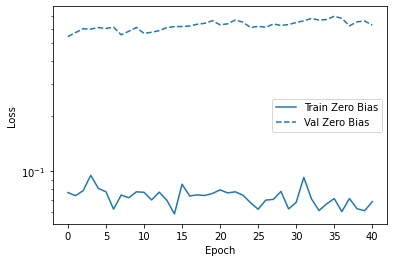

In [ ]:
plot_loss(resampled_history_adasyn, "Zero Bias", 0)

In [ ]:
train_predictions_resampled_adasyn = resampled_model_adasyn.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled_adasyn = resampled_model_adasyn.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.6077751517295837
tp :  10.0
fp :  19.0
tn :  282.0
fn :  11.0
accuracy :  0.9068322777748108
precision :  0.3448275923728943
recall :  0.4761904776096344
auc :  0.7566841244697571
prc :  0.39467525482177734

Legitimate Transactions Detected (True Negatives):  282
Legitimate Transactions Incorrectly Detected (False Positives):  19
Fraudulent Transactions Missed (False Negatives):  11
Fraudulent Transactions Detected (True Positives):  10
Total Fraudulent Transactions:  21


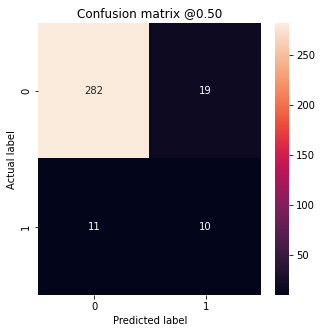

In [ ]:
resampled_results_adasyn = resampled_model_adasyn.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_adasyn.metrics_names, resampled_results_adasyn):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled_adasyn)

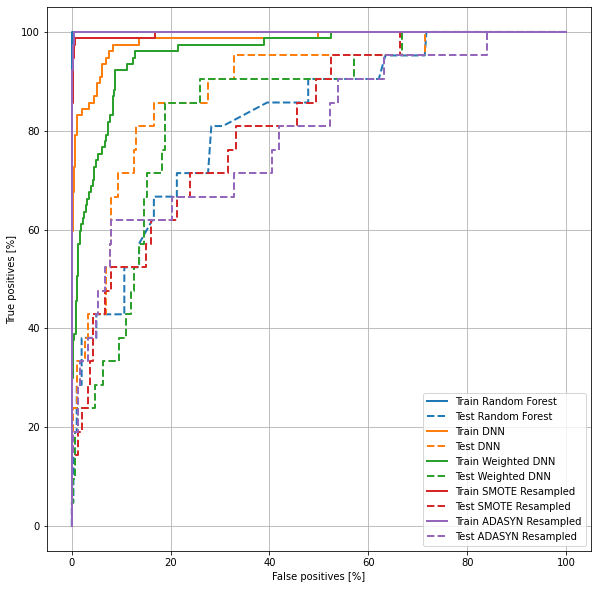

In [ ]:
plot_roc("Train Random Forest", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_roc("Test Random Forest", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

plot_roc("Train DNN", train_labels, train_predictions_baseline, color=colors[1])
plot_roc("Test DNN", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')

plot_roc("Train Weighted DNN", train_labels, train_predictions_weighted, color=colors[2])
plot_roc("Test Weighted DNN", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

plot_roc("Train SMOTE Resampled", train_labels, train_predictions_resampled, color=colors[3])
plot_roc("Test SMOTE Resampled", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')

plot_roc("Train ADASYN Resampled", train_labels, train_predictions_resampled_adasyn, color=colors[4])
plot_roc("Test ADASYN Resampled", test_labels, test_predictions_resampled_adasyn, color=colors[4], linestyle='--')

plt.legend(loc='lower right')

## **GAN 모델을 적용한 방법**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [ ]:
def generate_fake_samples(n,feature_n):
  X = np.random.randn(n,feature_n)
  Y = np.zeros((n,1))
  return X, Y

In [ ]:
# input : 진짜+가짜 데이터
# output : 진짜면 1 가짜면 0
def discriminator_model(n):
  model = Sequential()
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform',input_dim=n))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(32, activation='relu',input_dim=n))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(16,activation='relu'))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
pos_features.shape

(77, 18)

In [ ]:
n_input, n_feature = pos_features.shape
discriminator_model = discriminator_model(n_feature)
discriminator_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                1216      
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dropout_22 (Dropout)        (None, 16)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                

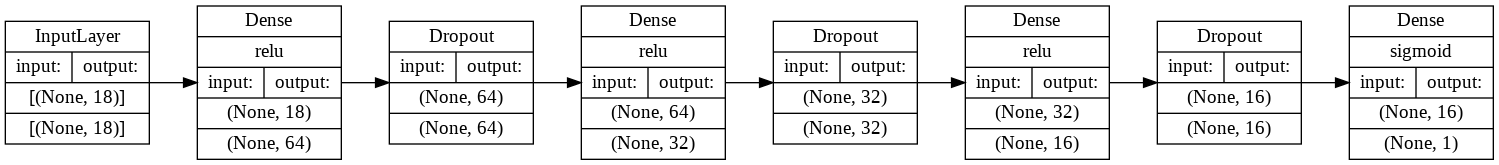

In [ ]:
plot_model(discriminator_model, to_file='discriminator_model_plot.png', 
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           rankdir='LR',
           expand_nested=True,
           )

In [ ]:
def gen_batch(X,batch_size):
  length = len(X)
  bins = length // batch_size
  if length % batch_size:
    bins += 1

  indexes = np.random.permutation(np.arange(len(X)))
  X = X[indexes]
  for i in range(bins):
    start = batch_size * i
    end = batch_size * (i+1)
    yield X[start:end]

In [ ]:
def train_discriminator(model,X,n_batch, n_epochs=100):
  half_batch = int(n_batch/2)
  n_input, n_feature = X.shape
  for i in tqdm(range(n_epochs)):
    for X_real in gen_batch(X, half_batch):
      y_real = np.ones((len(X_real),1))
      model.train_on_batch(X_real,y_real)
      X_fake, y_fake = generate_fake_samples(half_batch,n_feature)
      model.train_on_batch(X_fake,y_fake)

      _, acc_real = model.evaluate(X_real, y_real, verbose=0)
      _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    if i % 100 == 0:
      print(i,acc_real,acc_fake)

In [ ]:
# 실제데이터는 label이 1, 가짜데이터는 label이 0
train_discriminator(discriminator_model,pos_features,32)

  1%|          | 1/100 [00:00<01:22,  1.19it/s]

0 1.0 0.0


100%|██████████| 100/100 [00:50<00:00,  1.97it/s]


In [ ]:
# input = 아무 난수
# output = 우리가 필요한 데이터 feature 개수랑 똑같은 데이터
def generator_model(latent_dim, n_outputs):
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
  model.add(keras.layers.Dropout(0.2))
  model.add(Dense(16,activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(Dense(n_outputs,activation='linear'))
  return model

In [ ]:
latent_dim = 20
generator_model = generator_model(latent_dim, n_feature)
generator_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                672       
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 18)                306       
                                                                 
Total params: 1,506
Trainable params: 1,506
Non-trainable params: 0
_________________________________________________________________


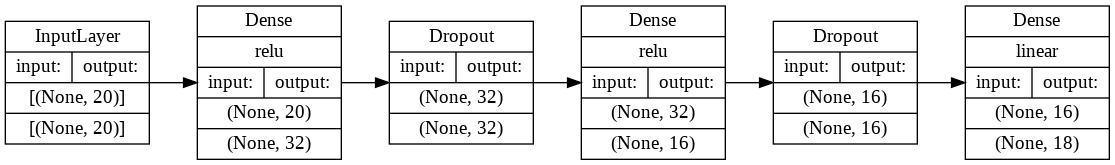

In [ ]:
plot_model(generator_model, to_file='generator_plot.png', 
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           rankdir='LR',
           expand_nested=True,
           )

In [ ]:
def generate_latent_points(latent_dim, n):
  x_input = np.random.randn(latent_dim * n)
  x_input = x_input.reshape(n, latent_dim)
  return x_input

In [ ]:
def generate_fake_samples(generator, latent_dim, n):
  x_input = generate_latent_points(latent_dim, n)
  X = generator.predict(x_input)
  y = np.zeros((n, 1))
  return X, y

In [ ]:
def gan_model(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

In [ ]:
gan_model = gan_model(generator_model, discriminator_model)
gan_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 18)                1506      
                                                                 
 sequential_7 (Sequential)   (None, 1)                 3841      
                                                                 
Total params: 5,347
Trainable params: 1,506
Non-trainable params: 3,841
_________________________________________________________________


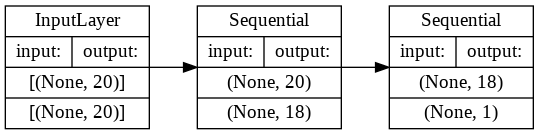

In [ ]:
plot_model(gan_model, to_file='gan_plot.png',
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           rankdir='LR',
           #expand_nested=True,
           )

In [ ]:
def train_gan(gan_model, latent_dim, n_epochs=1000, n_batch=32):
  for i in range(n_epochs):
    x_gan = generate_latent_points(latent_dim,n_batch)
    y_gan = np.ones((n_batch,1))
    gan_model.train_on_batch(x_gan,y_gan)

In [ ]:
def train(g_model, d_model, gan_model,X, latent_dim, n_epochs=1000, n_batch=128):
  half_batch = int(n_batch / 2)
  for i in tqdm(range(n_epochs)):
    for x_real in gen_batch(X, half_batch):
      y_real = np.ones((len(x_real),1))
      x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      d_model.train_on_batch(x_real, y_real)
      d_model.train_on_batch(x_fake, y_fake)

      x_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = np.ones((n_batch, 1))

      gan_model.train_on_batch(x_gan, y_gan)

In [ ]:
train(generator_model, discriminator_model,gan_model,pos_features, latent_dim)

100%|██████████| 1000/1000 [01:59<00:00,  8.36it/s]


In [ ]:
generate_num = len(neg_features)-len(pos_features)

In [ ]:
new_pos_features, new_pos_labels = generate_fake_samples(generator_model, latent_dim, generate_num)

In [ ]:
res_pos_features = np.concatenate((pos_features,new_pos_features))
res_pos_labels = np.ones(shape=(res_pos_features.shape[0]),dtype=int)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2158, 18)

In [ ]:
resampled_model_gan = keras.Sequential([
      keras.layers.Dense(64, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(32,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid')
  ])

resampled_model_gan.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [ ]:
resampled_history_gan = resampled_model_gan.fit(
    resampled_features,
    resampled_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
68/68 [==============================] - 4s 20ms/step - loss: 0.6972 - tp: 480.0000 - fp: 388.0000 - tn: 992.0000 - fn: 620.0000 - accuracy: 0.5935 - precision: 0.5530 - recall: 0.4364 - auc: 0.6456 - prc: 0.5574 - val_loss: 0.5758 - val_tp: 6.0000 - val_fp: 11.0000 - val_tn: 109.0000 - val_fn: 3.0000 - val_accuracy: 0.8915 - val_precision: 0.3529 - val_recall: 0.6667 - val_auc: 0.8218 - val_prc: 0.6655
Epoch 2/100
68/68 [==============================] - 0s 7ms/step - loss: 0.5343 - tp: 748.0000 - fp: 212.0000 - tn: 867.0000 - fn: 331.0000 - accuracy: 0.7484 - precision: 0.7792 - recall: 0.6932 - auc: 0.8279 - prc: 0.8345 - val_loss: 0.3737 - val_tp: 6.0000 - val_fp: 9.0000 - val_tn: 111.0000 - val_fn: 3.0000 - val_accuracy: 0.9070 - val_precision: 0.4000 - val_recall: 0.6667 - val_auc: 0.8856 - val_prc: 0.6817
Epoch 3/100
68/68 [==============================] - 1s 8ms/step - loss: 0.4175 - tp: 848.0000 - fp: 151.0000 - tn: 928.0000 - fn: 231.0000 - accuracy: 0.8230 - pre

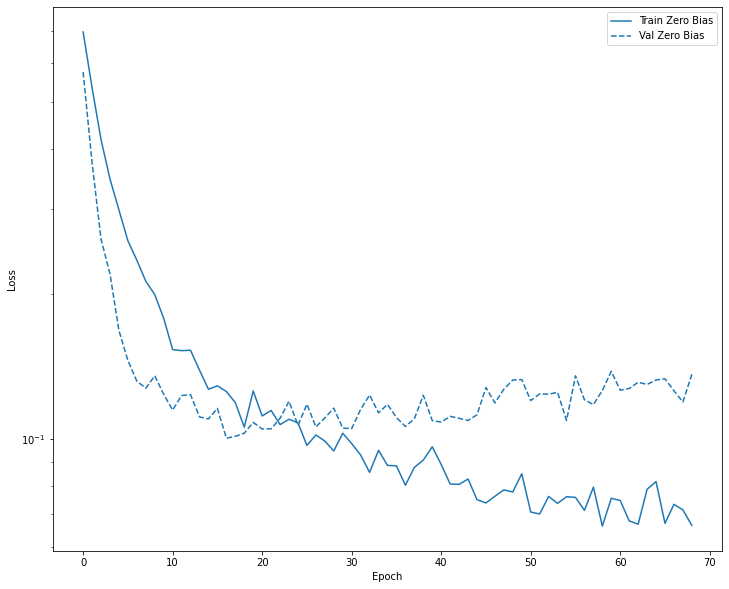

In [ ]:
plot_loss(resampled_history_gan, "Zero Bias", 0)

In [ ]:
train_predictions_resampled_gan = resampled_model_gan.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled_gan = resampled_model_gan.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.21368002891540527
tp :  6.0
fp :  5.0
tn :  296.0
fn :  15.0
accuracy :  0.9378882050514221
precision :  0.5454545617103577
recall :  0.2857142984867096
auc :  0.8431419134140015
prc :  0.3438403606414795

Legitimate Transactions Detected (True Negatives):  296
Legitimate Transactions Incorrectly Detected (False Positives):  5
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  6
Total Fraudulent Transactions:  21


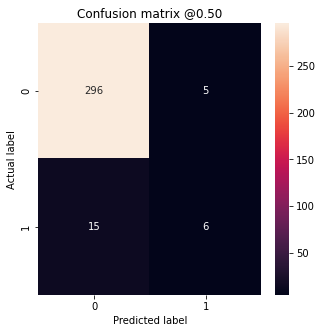

In [ ]:
resampled_results_gan = resampled_model_gan.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_gan.metrics_names, resampled_results_gan):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled_gan)

In [ ]:
plot_roc("Train Random Forest", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_roc("Test Random Forest", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

plot_roc("Train DNN", train_labels, train_predictions_baseline, color=colors[1])
plot_roc("Test DNN", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')

plot_roc("Train Weighted DNN", train_labels, train_predictions_weighted, color=colors[2])
plot_roc("Test Weighted DNN", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

plot_roc("Train SMOTE Resampled", train_labels, train_predictions_resampled, color=colors[3])
plot_roc("Test SMOTE Resampled", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')

plot_roc("Train ADASYN Resampled", train_labels, train_predictions_resampled_adasyn, color=colors[4])
plot_roc("Test ADASYN Resampled", test_labels, test_predictions_resampled_adasyn, color=colors[4], linestyle='--')

plot_roc("Train GAN Resampled", train_labels, train_predictions_resampled_gan, color=colors[5])
plot_roc("Test GAN Resampled", test_labels, test_predictions_resampled_gan, color=colors[5], linestyle='--')

plt.legend(loc='lower right')

In [ ]:
#plot_roc("Train Random Forest", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_roc("Test Random Forest", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')


#plot_roc("Train DNN", train_labels, train_predictions_baseline, color=colors[1])
plot_roc("Test DNN", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')

#plot_roc("Train Weighted DNN", train_labels, train_predictions_weighted, color=colors[2])
plot_roc("Test Weighted DNN", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

#plot_roc("Train SMOTE Resampled", train_labels, train_predictions_resampled, color=colors[3])
plot_roc("Test SMOTE Resampled", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')

#plot_roc("Train ADASYN Resampled", train_labels, train_predictions_resampled_adasyn, color=colors[4])
plot_roc("Test ADASYN Resampled", test_labels, test_predictions_resampled_adasyn, color=colors[4], linestyle='--')

#plot_roc("Train GAN Resampled", train_labels, train_predictions_resampled_GAN, color=colors[5])
plot_roc("Test GAN Resampled", test_labels, test_predictions_resampled_gan, color=colors[5], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
plot_precision_recall_curve("Train Random Forest", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_precision_recall_curve("Test Random Forest", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

plot_precision_recall_curve("Train DNN", train_labels, train_predictions_baseline, color=colors[1])
plot_precision_recall_curve("Test DNN", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')

plot_precision_recall_curve("Train Weighted DNN", train_labels, train_predictions_weighted, color=colors[2])
plot_precision_recall_curve("Test Weighted DNN", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

plot_precision_recall_curve("Train SMOTE Resampled", train_labels, train_predictions_resampled, color=colors[3])
plot_precision_recall_curve("Test SMOTE Resampled", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')

plot_precision_recall_curve("Train ADASYN Resampled", train_labels, train_predictions_resampled_adasyn, color=colors[4])
plot_precision_recall_curve("Test ADASYN Resampled", test_labels, test_predictions_resampled_adasyn, color=colors[4], linestyle='--')

plot_precision_recall_curve("Train GAN Resampled", train_labels, train_predictions_resampled_gan, color=colors[5])
plot_precision_recall_curve("Test GAN Resampled", test_labels, test_predictions_resampled_gan, color=colors[5], linestyle='--')

plt.legend(loc='lower right')

# update gan

In [ ]:
def generate_fake_samples(batch_size,neg_features):
  ran_index = np.random.randint(len(neg_features), size=batch_size)
  X = neg_features[ran_index]
  Y = np.zeros((batch_size,1))
  return X, Y

In [ ]:
# input : 진짜+가짜 데이터
# output : 진짜면 1 가짜면 0
def discriminator_model(n):
  model = Sequential()
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform',input_dim=n))
  #model.add(keras.layers.Dropout(0.3))
  model.add(Dense(32, activation='relu',input_dim=n))
  #model.add(keras.layers.Dropout(0.3))
  model.add(Dense(16,activation='relu'))
  #model.add(keras.layers.Dropout(0.3))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [ ]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
pos_features.shape

(77, 18)

In [ ]:
n_input, n_feature = pos_features.shape
discriminator_model = discriminator_model(n_feature)
discriminator_model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                1216      
                                                                 
 dense_73 (Dense)            (None, 32)                2080      
                                                                 
 dense_74 (Dense)            (None, 16)                528       
                                                                 
 dense_75 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


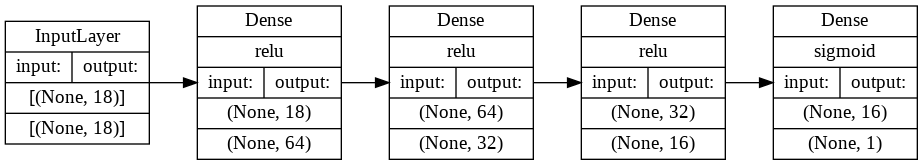

In [ ]:
plot_model(discriminator_model, to_file='discriminator_model_plot.png', 
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           rankdir='LR',
           expand_nested=True,
           )

In [ ]:
def gen_batch(X,batch_size):
  length = len(X)
  bins = length // batch_size
  if length % batch_size:
    bins += 1

  indexes = np.random.permutation(np.arange(len(X)))
  X = X[indexes]
  for i in range(bins):
    start = batch_size * i
    end = batch_size * (i+1)
    yield X[start:end]

In [ ]:
def train_discriminator(model,X,n_batch, n_epochs=501):
  half_batch = int(n_batch/2)
  n_input, n_feature = X.shape
  for i in tqdm(range(n_epochs)):
    for X_real in gen_batch(X, half_batch):
      y_real = np.ones((len(X_real),1))
      model.train_on_batch(X_real,y_real)
      X_fake, y_fake = generate_fake_samples(half_batch,neg_features)
      model.train_on_batch(X_fake,y_fake)

      _, acc_real = model.evaluate(X_real, y_real, verbose=0)
      _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
    if i % 100 == 0:
      print(i,acc_real,acc_fake)

In [ ]:
# 실제데이터는 label이 1, 가짜데이터는 label이 0
train_discriminator(discriminator_model,pos_features,16)

  0%|          | 1/501 [00:01<16:21,  1.96s/it]

0 0.800000011920929 0.875


 20%|██        | 101/501 [01:48<06:54,  1.04s/it]

100 0.800000011920929 0.875


 40%|████      | 201/501 [03:34<05:06,  1.02s/it]

200 1.0 1.0


 60%|██████    | 301/501 [05:29<04:38,  1.39s/it]

300 1.0 1.0


 80%|████████  | 401/501 [07:29<01:45,  1.05s/it]

400 1.0 1.0


100%|██████████| 501/501 [09:17<00:00,  1.11s/it]

500 1.0 1.0


In [ ]:
# input = 아무 난수
# output = 우리가 필요한 데이터 feature 개수랑 똑같은 데이터
def generator_model(latent_dim, n_outputs):
  model = Sequential()
  model.add(Dense(64, activation='tanh',input_dim=latent_dim))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(32, activation='tanh',input_dim=latent_dim))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(16,activation='tanh'))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(n_outputs,activation='linear'))
  return model

In [ ]:
latent_dim = 5
generator_model = generator_model(latent_dim, n_feature)
generator_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 64)                384       
                                                                 
 dropout_57 (Dropout)        (None, 64)                0         
                                                                 
 dense_93 (Dense)            (None, 32)                2080      
                                                                 
 dropout_58 (Dropout)        (None, 32)                0         
                                                                 
 dense_94 (Dense)            (None, 16)                528       
                                                                 
 dropout_59 (Dropout)        (None, 16)                0         
                                                                 
 dense_95 (Dense)            (None, 18)              

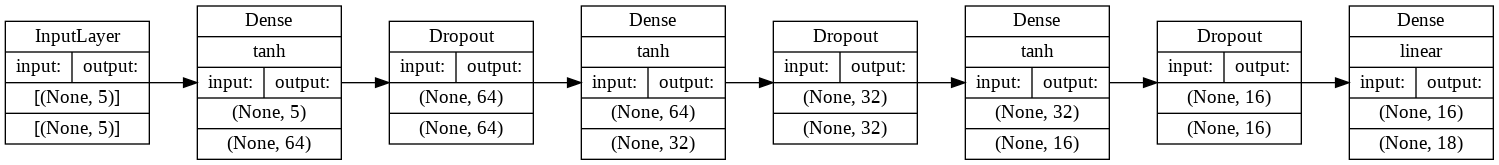

In [ ]:
plot_model(generator_model, to_file='generator_plot.png', 
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           rankdir='LR',
           expand_nested=True,
           )

In [ ]:
def generate_latent_points(latent_dim, n):
  x_input = np.random.randn(latent_dim * n)
  x_input = x_input.reshape(n, latent_dim)
  return x_input

In [ ]:
def generate_fake_samples_with_model(generator, latent_dim, n):
  x_input = generate_latent_points(latent_dim, n)
  X = generator.predict(x_input)
  y = np.zeros((n, 1))
  return X, y

In [ ]:
def gan_model(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

In [ ]:
gan_model = gan_model(generator_model, discriminator_model)
gan_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_28 (Sequential)  (None, 18)                3298      
                                                                 
 sequential_22 (Sequential)  (None, 1)                 3841      
                                                                 
Total params: 7,139
Trainable params: 3,298
Non-trainable params: 3,841
_________________________________________________________________


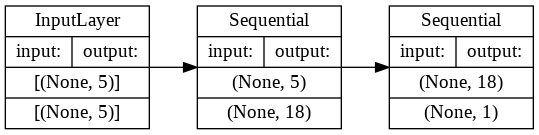

In [ ]:
plot_model(gan_model, to_file='gan_plot.png',
           show_shapes=True, 
           show_layer_names=False,
           show_layer_activations=True,
           rankdir='LR',
           #expand_nested=True,
           )

In [ ]:
def train_gan(gan_model, latent_dim, n_epochs=1000, n_batch=32):
  for i in range(n_epochs):
    x_gan = generate_latent_points(latent_dim,n_batch)
    y_gan = np.ones((n_batch,1))
    gan_model.train_on_batch(x_gan,y_gan)

In [ ]:
def train(g_model, d_model, gan_model,X, latent_dim, n_epochs=1000, n_batch=32):
  half_batch = int(n_batch / 2)
  for i in tqdm(range(n_epochs)):
    for x_real in gen_batch(X, half_batch):
      y_real = np.ones((len(x_real),1))
      x_fake, y_fake = generate_fake_samples_with_model(g_model, latent_dim, half_batch)
      d_model.train_on_batch(x_real, y_real)
      d_model.train_on_batch(x_fake, y_fake)

      x_gan = generate_latent_points(latent_dim, n_batch)
      y_gan = np.ones((n_batch, 1))

      gan_model.train_on_batch(x_gan, y_gan)

In [ ]:
train(generator_model, discriminator_model,gan_model,pos_features, latent_dim, n_epochs=1000, n_batch=32)

100%|██████████| 1000/1000 [05:00<00:00,  3.33it/s]


In [ ]:
generate_num = len(neg_features)-len(pos_features)

In [ ]:
new_pos_features, new_pos_labels = generate_fake_samples_with_model(generator_model, latent_dim, generate_num)

In [ ]:
res_pos_features = np.concatenate((pos_features,new_pos_features))
res_pos_labels = np.ones(shape=(res_pos_features.shape[0]),dtype=int)

In [ ]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(2158, 18)

In [ ]:
resampled_model_gan = keras.Sequential([
      keras.layers.Dense(128, activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(64,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(16,activation='relu'),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(1, activation='sigmoid')
  ])

resampled_model_gan.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [ ]:
early_stopping_gan = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min',
    restore_best_weights=True)

In [ ]:
resampled_history_gan = resampled_model_gan.fit(
    resampled_features,
    resampled_labels,
    batch_size=BATCH_SIZE,
    epochs=1000,
    callbacks=[early_stopping_gan],
    validation_data=(val_features, val_labels))

Epoch 1/1000
68/68 [==============================] - 1s 14ms/step - loss: 0.0395 - tp: 1060.0000 - fp: 5.0000 - tn: 1074.0000 - fn: 19.0000 - accuracy: 0.9889 - precision: 0.9953 - recall: 0.9824 - auc: 0.9986 - prc: 0.9989 - val_loss: 0.1559 - val_tp: 5.0000 - val_fp: 2.0000 - val_tn: 118.0000 - val_fn: 4.0000 - val_accuracy: 0.9535 - val_precision: 0.7143 - val_recall: 0.5556 - val_auc: 0.9144 - val_prc: 0.7467
Epoch 2/1000
68/68 [==============================] - 1s 11ms/step - loss: 0.0452 - tp: 1052.0000 - fp: 11.0000 - tn: 1068.0000 - fn: 27.0000 - accuracy: 0.9824 - precision: 0.9897 - recall: 0.9750 - auc: 0.9984 - prc: 0.9987 - val_loss: 0.1580 - val_tp: 6.0000 - val_fp: 2.0000 - val_tn: 118.0000 - val_fn: 3.0000 - val_accuracy: 0.9612 - val_precision: 0.7500 - val_recall: 0.6667 - val_auc: 0.8995 - val_prc: 0.7226
Epoch 3/1000
68/68 [==============================] - 1s 15ms/step - loss: 0.0460 - tp: 1059.0000 - fp: 10.0000 - tn: 1069.0000 - fn: 20.0000 - accuracy: 0.9861 - 

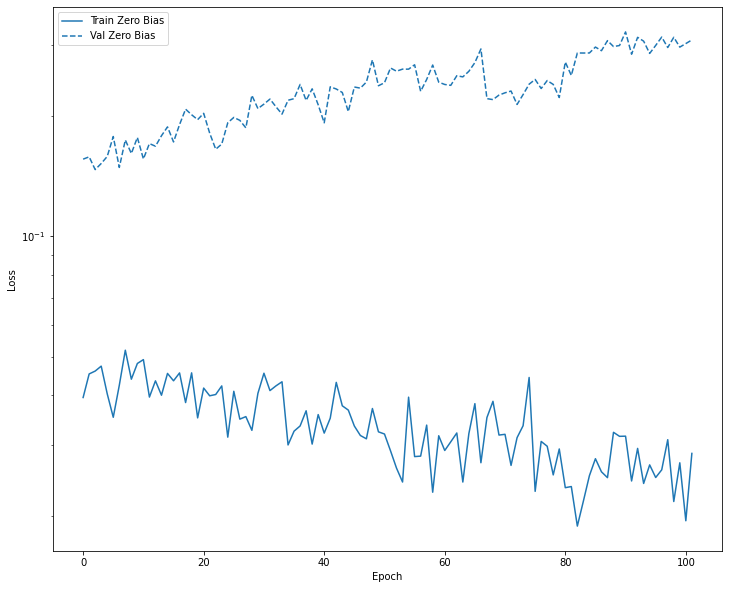

In [ ]:
plot_loss(resampled_history_gan, "Zero Bias",0)

In [ ]:
train_predictions_resampled_gan = resampled_model_gan.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled_gan = resampled_model_gan.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.22164912521839142
tp :  7.0
fp :  9.0
tn :  292.0
fn :  14.0
accuracy :  0.9285714030265808
precision :  0.4375
recall :  0.3333333432674408
auc :  0.8532668948173523
prc :  0.43003982305526733

Legitimate Transactions Detected (True Negatives):  292
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  14
Fraudulent Transactions Detected (True Positives):  7
Total Fraudulent Transactions:  21


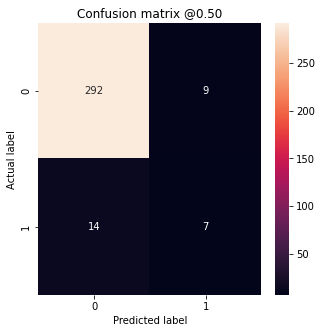

In [ ]:
resampled_results_gan = resampled_model_gan.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_gan.metrics_names, resampled_results_gan):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled_gan)

In [ ]:
sklearn.metrics.roc_auc_score(train_labels, train_predictions_baseline)

0.9645414826137718

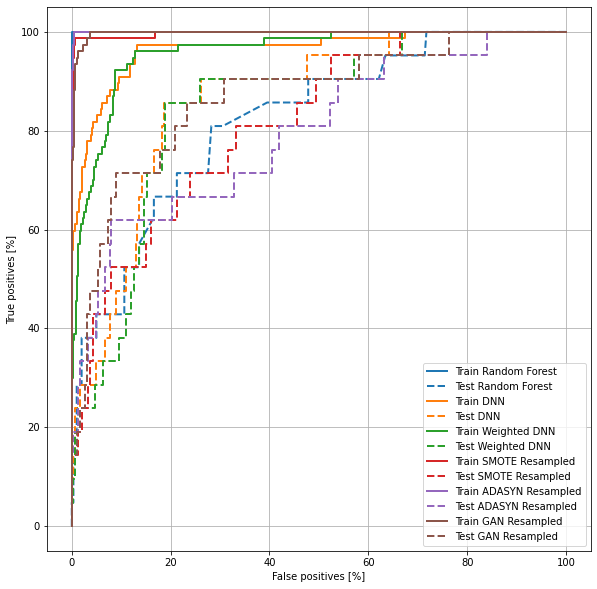

In [ ]:
plot_roc("Train Random Forest", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_roc("Test Random Forest", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

plot_roc("Train DNN", train_labels, train_predictions_baseline, color=colors[1])
plot_roc("Test DNN", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')

plot_roc("Train Weighted DNN", train_labels, train_predictions_weighted, color=colors[2])
plot_roc("Test Weighted DNN", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

plot_roc("Train SMOTE Resampled", train_labels, train_predictions_resampled, color=colors[3])
plot_roc("Test SMOTE Resampled", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')

plot_roc("Train ADASYN Resampled", train_labels, train_predictions_resampled_adasyn, color=colors[4])
plot_roc("Test ADASYN Resampled", test_labels, test_predictions_resampled_adasyn, color=colors[4], linestyle='--')

plot_roc("Train GAN Resampled", train_labels, train_predictions_resampled_gan, color=colors[5])
plot_roc("Test GAN Resampled", test_labels, test_predictions_resampled_gan, color=colors[5], linestyle='--')

plt.legend(loc='lower right')

In [ ]:
sklearn.metrics.roc_auc_score(test_labels,test_predictions_weighted)

0.8460686600221483

auc of  Test Random Forest  is  <function roc_auc_score at 0x7f40a7a03c20>
auc of  Test DNN  is  <function roc_auc_score at 0x7f40a7a03c20>
auc of  Test Weighted DNN  is  <function roc_auc_score at 0x7f40a7a03c20>
auc of  Test SMOTE Resampled  is  <function roc_auc_score at 0x7f40a7a03c20>
auc of  Test ADASYN Resampled  is  <function roc_auc_score at 0x7f40a7a03c20>
auc of  Test GAN Resampled  is  <function roc_auc_score at 0x7f40a7a03c20>


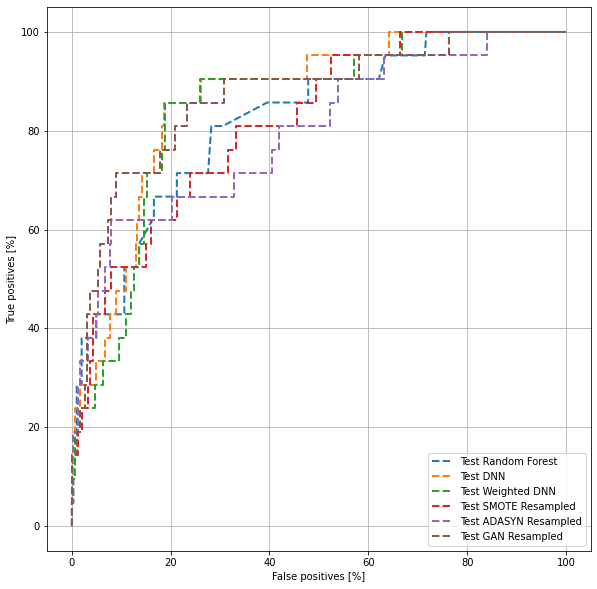

In [ ]:
#plot_roc("Train Random Forest", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_roc("Test Random Forest", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')


#plot_roc("Train DNN", train_labels, train_predictions_baseline, color=colors[1])
plot_roc("Test DNN", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')

#plot_roc("Train Weighted DNN", train_labels, train_predictions_weighted, color=colors[2])
plot_roc("Test Weighted DNN", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

#plot_roc("Train SMOTE Resampled", train_labels, train_predictions_resampled, color=colors[3])
plot_roc("Test SMOTE Resampled", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')

#plot_roc("Train ADASYN Resampled", train_labels, train_predictions_resampled_adasyn, color=colors[4])
plot_roc("Test ADASYN Resampled", test_labels, test_predictions_resampled_adasyn, color=colors[4], linestyle='--')

#plot_roc("Train GAN Resampled", train_labels, train_predictions_resampled_GAN, color=colors[5])
plot_roc("Test GAN Resampled", test_labels, test_predictions_resampled_gan, color=colors[5], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
plot_precision_recall_curve("Train Random Forest", train_labels, forest_clf.predict_proba(train_features)[:,1], color=colors[0])
plot_precision_recall_curve("Test Random Forest", test_labels, forest_clf.predict_proba(test_features)[:,1], color=colors[0], linestyle='--')

plot_precision_recall_curve("Train DNN", train_labels, train_predictions_baseline, color=colors[1])
plot_precision_recall_curve("Test DNN", test_labels, test_predictions_baseline, color=colors[1], linestyle='--')

plot_precision_recall_curve("Train Weighted DNN", train_labels, train_predictions_weighted, color=colors[2])
plot_precision_recall_curve("Test Weighted DNN", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

plot_precision_recall_curve("Train SMOTE Resampled", train_labels, train_predictions_resampled, color=colors[3])
plot_precision_recall_curve("Test SMOTE Resampled", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')

plot_precision_recall_curve("Train ADASYN Resampled", train_labels, train_predictions_resampled_adasyn, color=colors[4])
plot_precision_recall_curve("Test ADASYN Resampled", test_labels, test_predictions_resampled_adasyn, color=colors[4], linestyle='--')

plot_precision_recall_curve("Train GAN Resampled", train_labels, train_predictions_resampled_gan, color=colors[5])
plot_precision_recall_curve("Test GAN Resampled", test_labels, test_predictions_resampled_gan, color=colors[5], linestyle='--')

plt.legend(loc='lower right')